In [ ]:
# descompactação dos qrquivos
import zipfile
with zipfile.ZipFile('/content/tweets_sentiment.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')
with zipfile.ZipFile('/content/tweets_ellon_sentiment.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')
with zipfile.ZipFile('/content/tweets_ellon_filtered_sentiment.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [ ]:
# salvando os arquivos em variaveis
import pandas as pd
elon_data = pd.read_csv('scored_ellon_tweets.csv')
filtered_data = pd.read_csv('scored_ellon_filtered_tweets.csv')
data = pd.read_csv('scored_tweets.csv')

In [ ]:
# definição do Y para a classificação da IA
def apply_classification(variation):
  if variation > 0:
    return 1
  elif variation <= 0:
    return 0
data['variation'] = data['variation'].apply(lambda variation: apply_classification(variation))
elon_data['variation'] = elon_data['variation'].apply(lambda variation: apply_classification(variation))
filtered_data['variation'] = filtered_data['variation'].apply(lambda variation: apply_classification(variation))

In [ ]:
# separação do X e Y 
data.drop('open', inplace=True, axis=1)
data.drop('close', inplace=True, axis=1)
data.drop('volume', inplace=True, axis=1)
elon_data.drop('open', inplace=True, axis=1)
elon_data.drop('close', inplace=True, axis=1)
elon_data.drop('volume', inplace=True, axis=1)
filtered_data.drop('open', inplace=True, axis=1)
filtered_data.drop('close', inplace=True, axis=1)
filtered_data.drop('volume', inplace=True, axis=1)
X = data
Y = data['variation']
X.drop('variation', inplace=True, axis=1)
elon_X = elon_data
elon_Y = elon_data['variation']
elon_X.drop('variation', inplace=True, axis=1)
filtered_X = filtered_data
filtered_Y = filtered_data['variation']
filtered_X.drop('variation', inplace=True, axis=1)

In [ ]:
# algoritimo de grid search e cross validation
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn import svm
import sys
def best_model(data,result,Models_tested = 'A'):
  output_results = [];  output_groups = [];  randon_range = [0,1,2,4,8,16,32,64,128]
  depth_range = [2,4,8,16,32,64,128]; tree_range = [100, 500]; hidden_range = [100,1,2,4,8,16,32,64,128]
  penalty_options = [ 0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1];  kernel_range = ['rbf', 'sigmoid']
  intercept_options = [True, False]; kf = KFold(n_splits=10); best_kernel = '';
  best_intercept = True; best_randon = 0; best_hidden = 0; best_train = []
  best_1=0; best_2=0; best_3=0; best_4=0; best_5=0; best_6=0; best_score = 0
  best_depth = 0; best_tree = 0; best_test = []; best_model = ''; 
  best_penalty= ''; kfsplit = 0; best_kf = 0
  if 'A' in Models_tested:
    for randon in randon_range:
      for hidden in hidden_range:
        kfsplit = 0
        for train_index, test_index in kf.split(data):
            X_train, X_test = data.loc[train_index], data.loc[test_index]
            Y_train, Y_test = result[train_index], result[test_index]
            clf = MLPClassifier(random_state=randon, hidden_layer_sizes=hidden, max_iter=1000)
            clf.fit(X_train,Y_train)
            score = clf.score(X_test, Y_test)*100
            output_groups.append(score)
            if(score > best_1):
              best_train = train_index
              best_test = test_index
              best_1 = score
              best_randon = randon
              best_hidden = hidden
              best_kf = kfsplit
            sys.stdout.write('\r'+ f"atual-> {score}%     kfold->{kfsplit}      melhor-> {best_1}%")
            kfsplit = kfsplit+1
    sys.stdout.write('\r'+ '-------------------------------------------------------------------')
    print('')
    print('MLP')
    print('A melhor nota: ', best_1,'%')
    print('melhor randon_state: ',best_randon)
    print('melhor hidden_layer_sizes: ',best_hidden)
    print('melhor conjunto KFold:', best_kf)
    output_results.append(output_groups)
    output_groups = []
    best_score = best_1
    best_randon = 0
    best_model = 'MLP'
  if 'B' in Models_tested :
    print('0%', end="")
    for randon in randon_range:
      for kernel in kernel_range:
        kfsplit = 0
        for train_index, test_index in kf.split(data):
            X_train, X_test = data.loc[train_index], data.loc[test_index]
            Y_train, Y_test = result[train_index], result[test_index]
            clf = svm.SVC(kernel=kernel, C=1, random_state=randon)
            clf.fit(X_train,Y_train)
            score = clf.score(X_test, Y_test)*100
            output_groups.append(score)
            if(score > best_2):
              best_2 = score
              best_randon = randon
              best_kernel = kernel
              best_kf = kfsplit
              if best_2 > best_score:
                best_score = best_2
                best_train = train_index
                best_test = test_index
                best_model = 'SVC'
            sys.stdout.write('\r'+ f"atual-> {score}%       kfold->{kfsplit}        elhor-> {best_2}%")
            kfsplit = kfsplit+1
    sys.stdout.write('\r'+ '-------------------------------------------------------------------')
    print('')
    print('SVC')
    print('A melhor nota: ', best_2,'%')
    print('melhor randon_state: ',best_randon)
    print('melhor kernel: ',best_kernel)
    print('melhor conjunto KFold:', best_kf)
    output_results.append(output_groups)
    output_groups = []

  if 'C' in Models_tested :
    print('0%', end="")
    kfsplit = 0
    for train_index, test_index in kf.split(data):
      X_train, X_test = data.loc[train_index], data.loc[test_index]
      Y_train, Y_test = result[train_index], result[test_index]
      clf = DecisionTreeClassifier()
      clf.fit(X_train,Y_train)
      score = clf.score(X_test, Y_test)*100
      output_groups.append(score)
      if(score > best_3):
        best_3 = score
        best_kf = kfsplit
        if best_3 > best_score:
          best_score = best_3
          best_train = train_index
          best_test = test_index
          best_model = 'Decision Tree'
      sys.stdout.write('\r'+ f"atual-> {score}%            melhor-> {best_3}%")
      kfsplit = kfsplit+1
    sys.stdout.write('\r'+ '-------------------------------------------------------------------')
    print('')
    print('Decision Tree')
    print('A melhor nota: ', best_3,'%')
    print('melhor conjunto KFold:', best_kf)
    output_results.append(output_groups)
    output_groups = []
  if 'D' in Models_tested :
    print('0%', end="")
    kfsplit = 0
    for train_index, test_index in kf.split(data):
      X_train, X_test = data.loc[train_index], data.loc[test_index]
      Y_train, Y_test = result[train_index], result[test_index]
      clf = GaussianNB()
      clf.fit(X_train,Y_train)
      score = clf.score(X_test, Y_test)*100
      output_groups.append(score)
      if(score > best_4):
        best_4 = score
        best_kf = kfsplit
        if best_4 > best_score:
          best_score = best_4
          best_train = train_index
          best_test = test_index
          best_model = 'Naive Bayes'
      sys.stdout.write('\r'+ f"atual-> {score}%            melhor-> {best_4}%")
      kfsplit = kfsplit+1
    sys.stdout.write('\r'+ '-------------------------------------------------------------------')
    print('')
    print('Naive Bayes')
    print('A melhor nota: ', best_4,'%')
    print('melhor conjunto KFold:', best_kf)
    output_results.append(output_groups)
    output_groups = []
  if 'E' in Models_tested :
    print('0%', end="")
    for option in intercept_options:
      for penalty in penalty_options:
        kfsplit = 0
        for train_index, test_index in kf.split(data):
          X_train, X_test = data.loc[train_index], data.loc[test_index]
          Y_train, Y_test = result[train_index], result[test_index]
          clf = LogisticRegression(fit_intercept=option, penalty='elasticnet', solver='saga', l1_ratio=penalty, max_iter=10000)
          clf.fit(X_train,Y_train)
          score = clf.score(X_test, Y_test)*100
          output_groups.append(score)
          if(score > best_5):
            best_5 = score
            best_intercept = option
            best_penalty = penalty
            best_kf = kfsplit
            if best_5 > best_score:
              best_score = best_5
              best_train = train_index
              best_test = test_index
              best_model = 'Logistic Regression'
          sys.stdout.write('\r'+ f"atual-> {score}%      penalty->{penalty}      melhor-> {best_5}%")
          kfsplit = kfsplit+1
    sys.stdout.write('\r'+ '-------------------------------------------------------------------')
    print('')
    print('Logistic Regression')
    print('A melhor nota: ', best_5,'%')
    print('A melhor fit_interception: ', best_intercept)
    print('A melhor penalty: ', best_penalty)
    print('melhor conjunto KFold:', best_kf)
    output_results.append(output_groups)
    output_groups = []
  if 'F' in Models_tested :
    print('0%', end="")
    for tree in tree_range:
      for randon in randon_range:
        for depth in depth_range:
          kfsplit = 0
          for train_index, test_index in kf.split(data):
            X_train, X_test = data.loc[train_index], data.loc[test_index]
            Y_train, Y_test = result[train_index], result[test_index]
            clf = RandomForestClassifier(n_estimators= tree, max_depth=depth, random_state=randon, )
            clf.fit(X_train,Y_train)
            score = clf.score(X_test, Y_test)*100
            output_groups.append(score)
            if(score > best_6):
              best_6 = score
              best_randon = randon
              best_tree = tree
              best_depth = depth
              best_kf = kfsplit
              if best_6 > best_score:
                best_score = best_6
                best_train = train_index
                best_test = test_index
                best_model = 'Randon Forest'
            sys.stdout.write('\r'+ f"atual-> {score}%     depth->{depth}       melhor-> {best_6}%")
            kfsplit = kfsplit+1
    sys.stdout.write('\r'+ '-------------------------------------------------------------------')
    print('')
    print('Random Forest')
    print('A melhor nota: ', best_6,'%')
    print('A melhor randon_state: ', best_randon)
    print('A melhor max_depth: ', best_depth)
    print('A melhor n_estimators: ', best_tree)
    print('melhor conjunto KFold:', best_kf)
    output_results.append(output_groups)
    output_groups = []
  print('---------------------------------------------------------------------')
  print(f'o melhor modelo foi: {best_model}')
  print("\n\n")
  return output_results

'''
elon_clf = MLPClassifier(random_state=1, max_iter=300) #tree.DecisionTreeClassifier() #svm.SVC(kernel='poly', C=1, random_state=42)
elon_scores = cross_val_score(elon_clf, elon_X, result, cv=10)
elon_scores.max()
'''

"\nelon_clf = MLPClassifier(random_state=1, max_iter=300) #tree.DecisionTreeClassifier() #svm.SVC(kernel='poly', C=1, random_state=42)\nelon_scores = cross_val_score(elon_clf, elon_X, result, cv=10)\nelon_scores.max()\n"

In [ ]:
# algoritimo para plotagem dos histogramas dos resultados da IA
import matplotlib.pyplot as plt
import pandas as pd
def grid_hist(hist_data):
  models = ["MLP","SVC","Decision Tree","Naive Bayes", "Logistic Regression", "Random Forest"]
  fig=plt.figure()
  for idx,item in enumerate(hist_data):
    ax=fig.add_subplot(2,3,idx+1)
    data={'values': item}
    df = pd.DataFrame(data)
    df['values'].hist(bins=5,ax=ax)
    ax.set_title(models[idx])
  fig.tight_layout()
  plt.show()

-------------------------------------------------------------------
MLP
A melhor nota:  58.791208791208796 %
melhor randon_state:  1
melhor hidden_layer_sizes:  128
melhor conjunto KFold: 7
-------------------------------------------------------------------
SVC
A melhor nota:  56.830601092896174 %
melhor randon_state:  0
melhor kernel:  sigmoid
melhor conjunto KFold: 0
-------------------------------------------------------------------
Decision Tree
A melhor nota:  55.19125683060109 %
melhor conjunto KFold: 3
-------------------------------------------------------------------
Naive Bayes
A melhor nota:  57.377049180327866 %
melhor conjunto KFold: 5
-------------------------------------------------------------------
Logistic Regression
A melhor nota:  57.14285714285714 %
A melhor fit_interception:  True
A melhor penalty:  0.3
melhor conjunto KFold: 7
-------------------------------------------------------------------
Random Forest
A melhor nota:  62.841530054644814 %
A melhor randon_sta

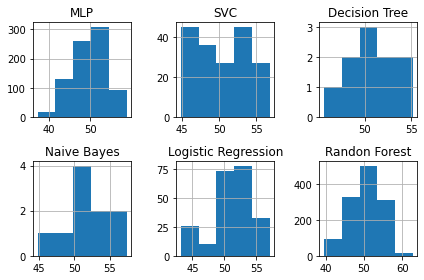

In [ ]:
# treinamento das IAs com os dados dos tweets de pessoas genericas
geral_results = best_model(X,Y,Models_tested = 'A B C D E F')
grid_hist(geral_results)

-------------------------------------------------------------------
MLP
A melhor nota:  61.702127659574465 %
melhor randon_state:  0
melhor hidden_layer_sizes:  1
melhor conjunto KFold: 5
-------------------------------------------------------------------
SVC
A melhor nota:  61.702127659574465 %
melhor randon_state:  0
melhor kernel:  rbf
melhor conjunto KFold: 5
-------------------------------------------------------------------
Decision Tree
A melhor nota:  54.60992907801418 %
melhor conjunto KFold: 6
-------------------------------------------------------------------
Naive Bayes
A melhor nota:  61.702127659574465 %
melhor conjunto KFold: 5
-------------------------------------------------------------------
Logistic Regression
A melhor nota:  55.633802816901415 %
A melhor fit_interception:  True
A melhor penalty:  0
melhor conjunto KFold: 0
-------------------------------------------------------------------
Random Forest
A melhor nota:  59.57446808510638 %
A melhor randon_state:  16


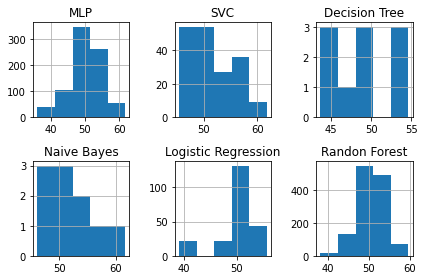

In [ ]:
# treinamento das IAs com os dados dos tweets do elon musk 
elon_results = best_model(elon_X,elon_Y,Models_tested = 'A B C D E F')
grid_hist(elon_results)

-------------------------------------------------------------------
MLP
A melhor nota:  75.0 %
melhor randon_state:  0
melhor hidden_layer_sizes:  1
melhor conjunto KFold: 4
-------------------------------------------------------------------
SVC
A melhor nota:  73.91304347826086 %
melhor randon_state:  0
melhor kernel:  rbf
melhor conjunto KFold: 4
-------------------------------------------------------------------
Decision Tree
A melhor nota:  59.34065934065934 %
melhor conjunto KFold: 9
-------------------------------------------------------------------
Naive Bayes
A melhor nota:  68.47826086956522 %
melhor conjunto KFold: 4
-------------------------------------------------------------------
Logistic Regression
A melhor nota:  58.69565217391305 %
A melhor fit_interception:  True
A melhor penalty:  0
melhor conjunto KFold: 6
-------------------------------------------------------------------
Random Forest
A melhor nota:  69.56521739130434 %
A melhor randon_state:  2
A melhor max_depth

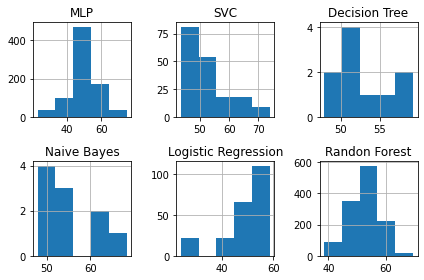

In [ ]:
# treinamento das IAs com os dados dos tweets do elon musk filtrados 
filtered_results =  best_model(filtered_X,filtered_Y,Models_tested = 'A B C D E F')
grid_hist(filtered_results)

In [ ]:
# Detalhamento da IA que apresentou melhores resultados
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
kfsplit=0
for train_index, test_index in kf.split(filtered_X):
  if kfsplit == 4:
    X_train, X_test = filtered_X.loc[train_index], filtered_X.loc[test_index]
    Y_train, Y_test = filtered_Y[train_index], filtered_Y[test_index]
    clf = MLPClassifier(random_state=0, hidden_layer_sizes=(2,8,16), max_iter=1000)
    clf.fit(X_train,Y_train)
    score = clf.score(X_test, Y_test)*100
    print(score)
    predicted = clf.predict(X_test)
    print(classification_report(Y_test, predicted))
  kfsplit = kfsplit+1

25.0
              precision    recall  f1-score   support

           0       0.25      1.00      0.40        23
           1       0.00      0.00      0.00        69

    accuracy                           0.25        92
   macro avg       0.12      0.50      0.20        92
weighted avg       0.06      0.25      0.10        92



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
